In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


## Dirac Comb

http://en.wikipedia.org/wiki/Dirac_delta_function

http://en.wikipedia.org/wiki/Dirac_comb

An impulse train (Dirac comb) can be expressed as an infinite sum of harmonics of the same amplitude, whose fundamental is the frequency of the impulse train. 

In [2]:
linspace(0, 1, 10)

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

$$ x(t) = cos(\omega t)$$ 

In [3]:
wt = linspace(0, 6 * pi, 20000)

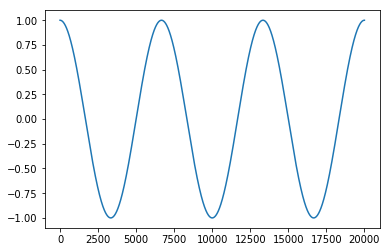

In [4]:
oscillation = cos(wt)
plot(oscillation);

How do I get the next harmonic i.e. double the frequency of this sinusoid?

$$ x(t) = cos(2 \pi f t)$$ 

In [5]:
f = 3
w = 2 * pi * f

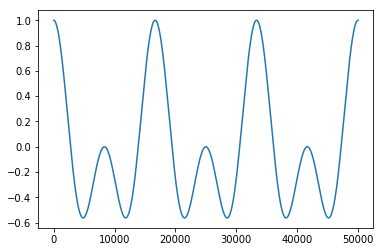

In [6]:
phase_t = linspace(0, w, 50000)
impulse = cos(phase_t) + cos(2*phase_t)
impulse /= 2
plot(impulse);

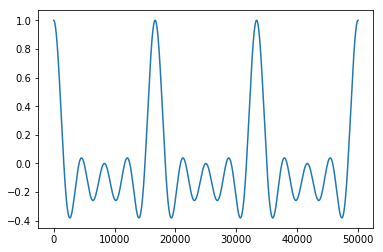

In [7]:
impulse = cos(phase_t) + cos(2*phase_t) + cos(3*phase_t) + cos(4*phase_t)
impulse /= 4
plot(impulse);

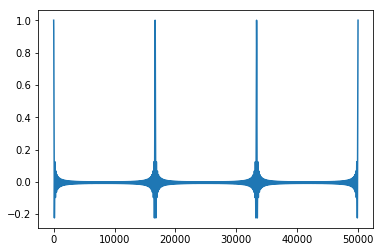

In [8]:
N = 100
phase = linspace(0, 6*pi, 50000)
harmonics = arange(N) + 1
impulse = zeros_like(phase)
for harmonic in harmonics:
    impulse += cos(harmonic * phase)
    
impulse /= N
plot(impulse);

(0, 5000)

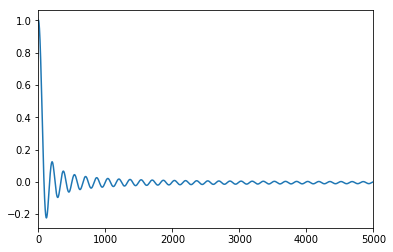

In [9]:
plot(impulse)
xlim((0, 5000))

Why do we use cosine? Isn't sine the same thing?

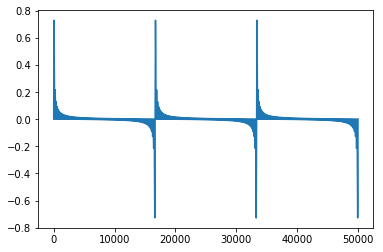

In [10]:
N = 100
phase = linspace(0, 6*pi, 50000)
harmonics = arange(N) + 1
impulse = zeros_like(phase)
for harmonic in harmonics:
    impulse += sin(harmonic * phase)
    
impulse /= N
plot(impulse);

## Sampling

Sampling can be described as a multiplication between the Dirac comb and the signal:

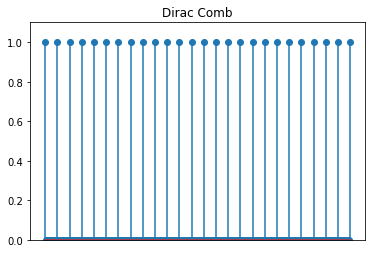

In [11]:
comb = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] * 25
comb [-1] = 1 # unholy trick to make some things simpler later...
# plot(comb)
stem(comb)
ylim(0, 1.1)
xticks(())
title("Dirac Comb")

To be strict, this that I just created is the Kronecker delta because it's discrete, but let's assume it's continuous

https://en.wikipedia.org/wiki/Kronecker_delta

Now let's get a function that we can sample:

In [12]:
from scipy.special import jn
jn(0, 0), jn(0, 1)

(1.0, 0.76519768655796661)

Bessel functions: http://en.wikipedia.org/wiki/Bessel_function

In [13]:
jn(1,0), jn(7,0.3), jn(1, 1)

(0.0, 3.3805443102187532e-10, 0.44005058574493355)

Our "Continuous" function: 

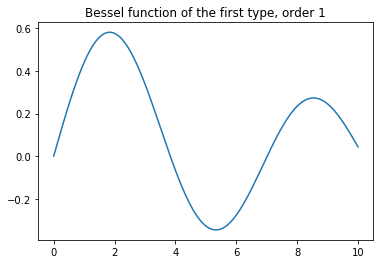

In [14]:
x = linspace(0,10, 500)
plot(x, jn(1,x))
title('Bessel function of the first type, order 1');

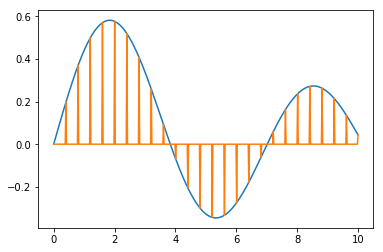

In [15]:
x = linspace(0,10, 500)
plot(x, jn(1,x))
plot(x, jn(1,x) * comb);

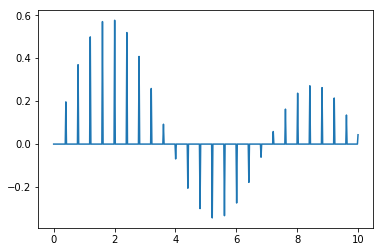

In [16]:
plot(x, jn(1,x) * comb);

Now just keep the values when the Dirac comb == 1

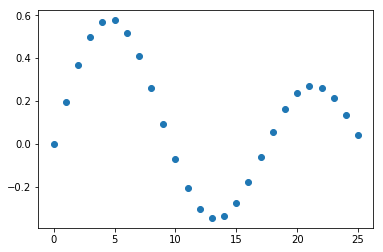

In [17]:
sampled = jn(1,x) * comb
samples = []
for i in range(len(comb)):
    if comb[i] == 1:
        samples.append(sampled[i])

plot(samples, 'o');

In [18]:
len(samples)

26

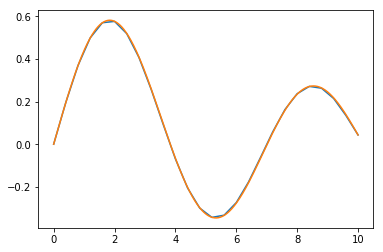

In [19]:
x = linspace(0,10, 500)
x_sampled = linspace(0,10, 26)
plot(x_sampled, samples)
plot(x, jn(1,x));

(0.3, 0.65)

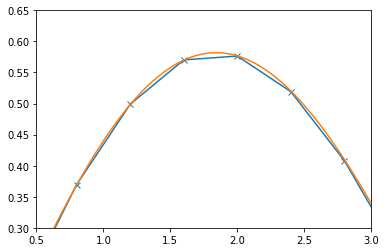

In [20]:
plot(x_sampled, samples, 'x-')
plot(x, jn(1,x));
xlim((0.5, 3))
ylim((0.3, 0.65))

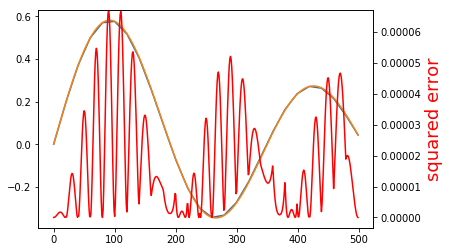

In [21]:
from scipy.interpolate import interp1d
interpf = interp1d(linspace(0,10, len(samples)), samples)
sqe = (jn(1,x) - interpf(x))**2
plot(interpf(x))
plot(jn(1,x))

twinx()
plot(sqe, 'r')
axis(ymax= sqe.max())
ylabel('squared error', color='r',fontsize=18);

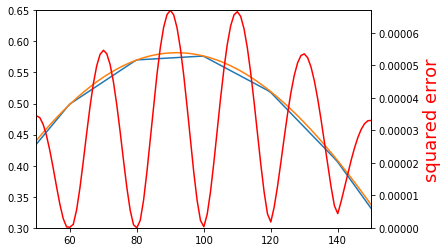

In [22]:
sqe = (jn(1,x) - interpf(x))**2
plot(interpf(x))
plot(jn(1,x))
ylim((0.3, 0.65))

twinx()
axis(ymax= sqe.max())
gca().set_ylabel('squared error', color='r',fontsize=18)
plot(sqe, 'r')
xlim((50,150));

In [23]:
MSE = sqe.mean()
print(MSE)

1.79419961959e-05


Mean squared error is a common way to quantify the difference between two signals:

$MSE = \frac{1}{n}\sum_{i=1}^n(X_1 - X_2)^2$

***Note:* This does not mean that the digitized signal has that error!**

It just means that if we reconstruct the signal by drawing straight lines we get this error.

# Sampling theorem

If a function $x(t)$  contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced 1/(2B) seconds apart.

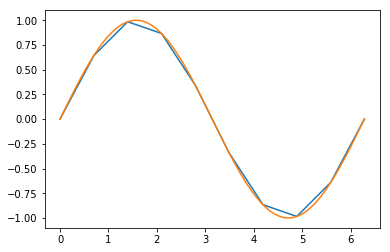

In [24]:
x = linspace(0, 2*pi, 10)
x0 = linspace(0, 2*pi, 100)
plot(x, sin(x))
plot(x0, sin(x0))

But.... isn't there loss here? Even though the samples are spaced closer than 1/B???



.

.


.


.

.

.


.


.

Although there is a difference between the different sampled signals, no information from the original signal has been lost!

i.e. when we do the ADC there will be no difference between either. (in theory...  it's another thing in practice!)

## Foldover/Aliasing

But there will be a difference if there are less than two points per sine oscillation, i.e. when the frequency we are sampling is higher that sr/2 (Nyquist frequency).

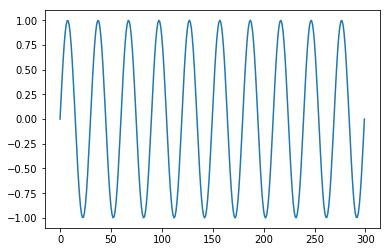

In [25]:
phs = linspace(0, 10 * 2 * pi, 300)
plot(sin(phs))

Anything less than 20 points will cause problems:

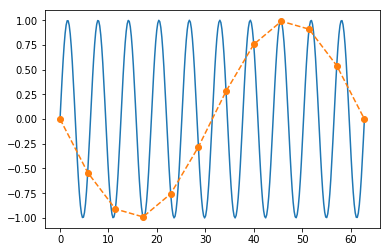

In [26]:
phs = linspace(0, 10 * 2 * pi, 300)
plot(phs, sin(phs))
phs = linspace(0, 10 * 2 * pi, 12)
plot(phs, sin(phs), 'o--')

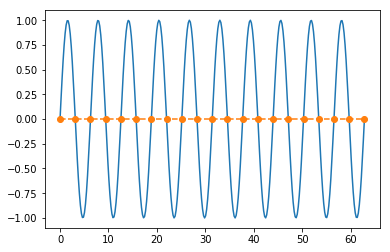

In [27]:
phs = linspace(0, 10 * 2 * pi, 300)
plot(phs, sin(phs))
phs = linspace(0, 10 * 2 * pi, 21)
plot(phs, sin(phs), 'o--')

In discrete sampling twice the Nyquist frequency is the same as DC (i.e. frequency 0)...

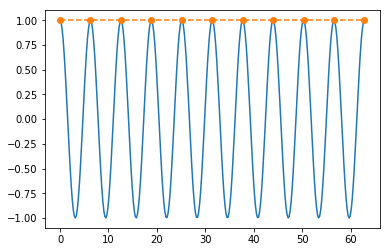

In [28]:
phs = linspace(0, 10 * 2 * pi, 300)
plot(phs, cos(phs))
phs = linspace(0, 10 * 2 * pi, 11)
plot(phs, cos(phs), 'o--')

The frequency of the foldover component is:

$$ f_{ALIAS} = \frac{f_s}{2} - (f_0 - \frac{f_s}{2})$$

i.e. fold/mirror the frequency around the Nyquist frequency.

$$ f_{ALIAS} = f_s - f_0$$

More strictly:

$$ f_{ALIAS} = f_s - (f_0\pmod {f_s})$$

The frequency wraps around the sampling frequency.


## Quantization

Once the signal has been sampled, a value needs to be assigned to it.

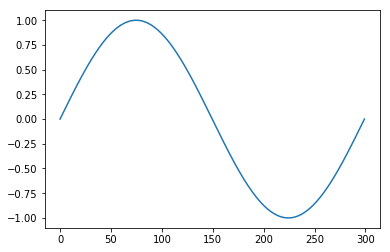

In [29]:
x = linspace(0, 2*pi, 300)
f = sin(x)
plot(f);

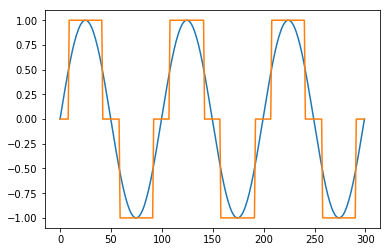

In [30]:
f = sin(3 * x)
f2 = (f*2).astype(int)
plot(f) 
plot(f2); 

These 3 different values can be encoded in 2 bits.

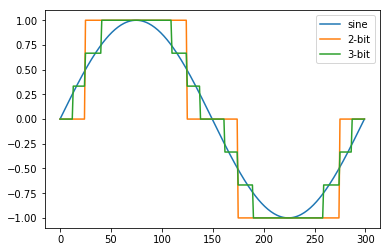

In [31]:
f = sin(x)
f2 = (f*2).astype(int)
f4 = (f*4).astype(int)
plot(f)
plot(f2)
plot(f4/3.0)
legend(['sine', '2-bit', '3-bit']);

In [32]:
2**2, 2**3

(4, 8)

In [33]:
2**16

65536

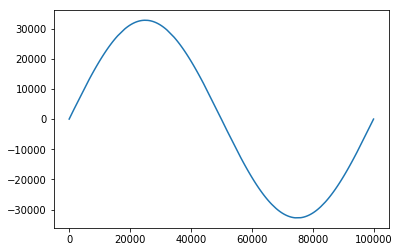

In [34]:
#integer representations
x = linspace(0, 2*pi, 100000)
f = sin(x)
N = 16 # number of bits
max_value = 2**(N-1) - 1
f16 = (f*(max_value)).astype(int16)
plot(f16);

(0, 80)

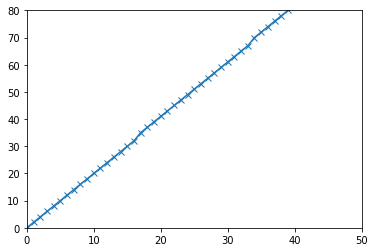

In [35]:
plot(f16, 'x-' )
xlim((0, 50))
ylim((0, 80))

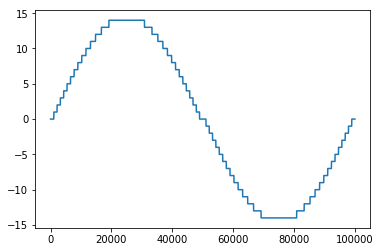

In [36]:
N = 5 # number of bits
max_value = 2**(N-1) - 1
f8 = (f*(max_value)).astype(int8)
plot(f8)

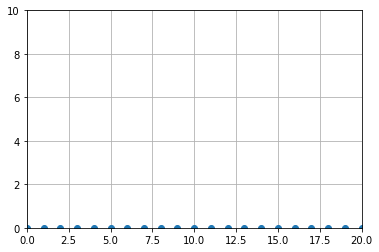

In [37]:
plot(f8, 'o')
xlim((0,20))
ylim((0, 10))
grid();

In [38]:
2**24

16777216

## Dynamic range

In [39]:
N = 16
20 * log10((2 ** (N - 1))/1)

def dynrange(N):
    return 20 * log10((2 ** (N - 1))/1)

In [40]:
print(dynrange(8), dynrange(16), dynrange(24))

42.144199393 90.3089986992 138.473798005


In [41]:
20*log10(0.5)

-6.0205999132796242

In [42]:
20*log10(60/30)

6.0205999132796242

Half the linear amplitude scale is only 6 dB!

## Amplitude encoding

In [43]:
22050 * 16

352800

In [44]:
352800 * 60

21168000

In [45]:
21168000/(8 * 1024)

2583.984375

When the values for amplitude are stored directly from the linear measurements of energy, this form of "encoding" is known as LPCM (Linear Pulse Code Modulation)

http://en.wikipedia.org/wiki/Pulse-code_modulation

Differential Pulse Code modulation stores the difference between samples

22542 -21853 44100


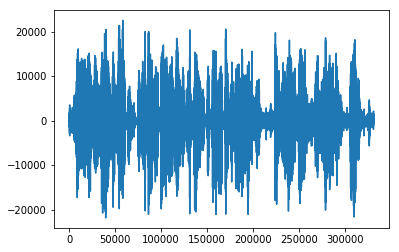

In [47]:
from scipy.io import wavfile

sr,audio = wavfile.read('media/passport.wav')
plot(audio)
print(audio.max(), audio.min(), sr)

In [48]:
2**16

65536

In [49]:
audio.dtype

dtype('int16')

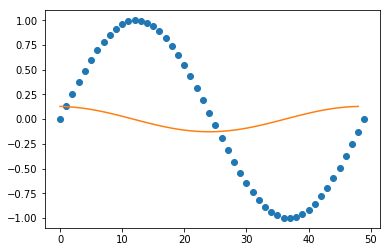

In [50]:
x = linspace(0, 2*pi, 50)
plot(sin(x), 'o')
plot(diff(sin(x)))

(15460, -15785)

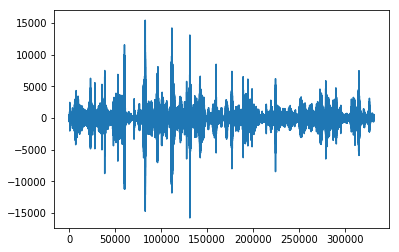

In [51]:
dpcm = diff(audio)
plot(dpcm)
dpcm.max(), dpcm.min()

In [52]:
log(max(dpcm.max(), abs(dpcm.min())))/log(2)

13.946267154895326

In [53]:
log(max(audio.max(), abs(audio.min())))/log(2)

14.460327425907881

ADPCM (Adaptive DPCM) uses different resolutions depending on what it needs.

Delta modulation encodes using only 1 bit to describe the change, and so requires a higher sampling rate. e.g. DSD

http://en.wikipedia.org/wiki/Direct_Stream_Digital

## A-law and $\mu\ \ $-law

The amplitude scale can be encoded "warped", i.e. non-linearly

$$F(x) = sgn(x) \frac{\ln(1+ \mu |x|)}{\ln(1+\mu)}~~~~-1 \leq x \leq 1$$

http://en.wikipedia.org/wiki/Mu-law_algorithm

The higher amplitudes are compressed to make the quantization non-linear.

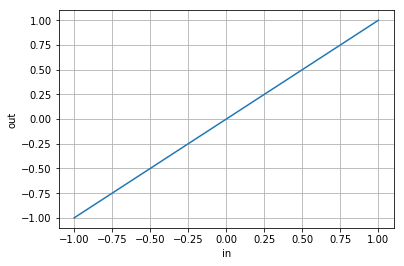

In [54]:
x = linspace(-1,1, 100)
ylabel('out')
xlabel('in')
plot(x, x)
grid()

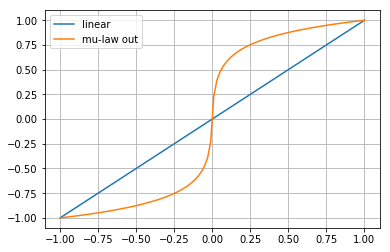

In [55]:
x = linspace(-1,1, 100)
bits = 8
mu = (2**bits) - 1

mu_shaping = sign(x)*log(1 + mu *abs(x))/log(1+mu)
plot(x, x, label= 'linear')
plot(x, mu_shaping, label= 'mu-law out')

legend(loc='best')
grid()

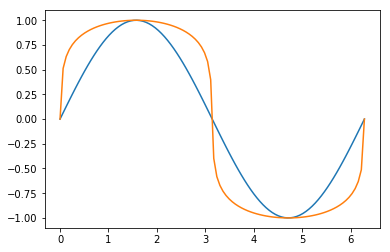

In [56]:
x = linspace(0, 2*pi, 100)
y = sin(x)

def mu_law(insig, nbits = 8):
    mu = (2**nbits) - 1
    return sign(insig)*log(1 + mu *abs(insig))/log(1+mu)

plot(x, y)
plot(x, mu_law(y))

A-law:

$$F(x) = sgn(x) \begin{cases} {A |x| \over 1 + \ln(A)}, & |x| < {1 \over A} \frac{1+ \ln(A |x|)}{1 + \ln(A)}, & {1 \over A} \leq |x| \leq 1, \end{cases}$$

http://en.wikipedia.org/w/index.php?title=A-law_algorithm&action=edit

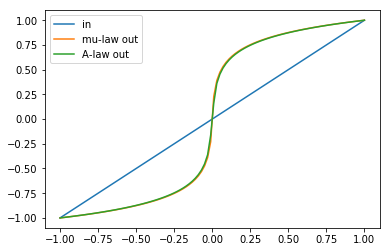

In [57]:
x = linspace(-1,1, 100)
A = 87.5
x = linspace(-1,1, 100)
a_shaping = sign(x) * where(abs(x) < 1/A, A*abs(x)/(1+log(A)), (1 + log(A*abs(x)))/(1+log(A)))
plot(x, x,label = 'in')
plot(x, mu_shaping, label= 'mu-law out')
plot(x, a_shaping, label = 'A-law out')


legend(loc='best')

(0, 1)

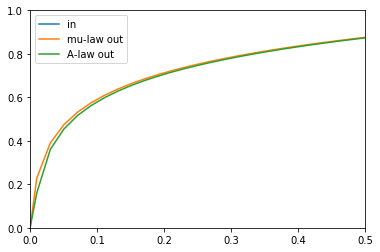

In [58]:
plot(x, label = 'in')
plot(x, mu_shaping, label= 'mu-law out')
plot(x, a_shaping, label = 'A-law out')

legend(loc='best')

xlim((0,0.5))
ylim((0,1))
     

Floating point formats can be thought of as "adaptive"

Floating point formats are represented using mantissa and exponent. 32-bit floats: 24-bit mantissa and 8 bit exponent. 

# Digital to Analog conversion

## Sample and hold

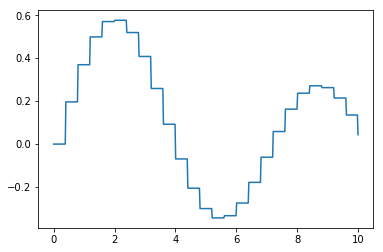

In [59]:
samplehold = interp1d(linspace(0,10, len(samples)), samples, kind='zero')
new_x = linspace(0, 10, 500)
plot(new_x, samplehold(new_x))

## Low-pass filter

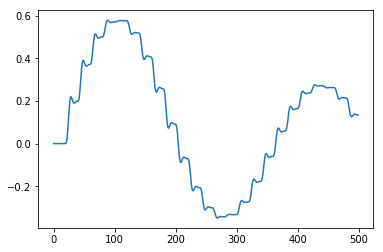

In [60]:
from scipy.signal import butter, lfilter

b, a = butter(4, 0.2, 'low')
lopassed = lfilter(b, a, samplehold(new_x))
plot(lopassed)


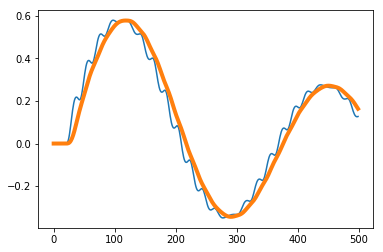

In [63]:

b, a = butter(4, 0.1, 'low')
lopassed = lfilter(b, a, samplehold(new_x))
plot(lopassed)

b, a = butter(4, 0.05, 'low')
lopassed = lfilter(b, a, samplehold(new_x))
plot(lopassed, lw=4)

In [64]:
from scipy.signal import bessel

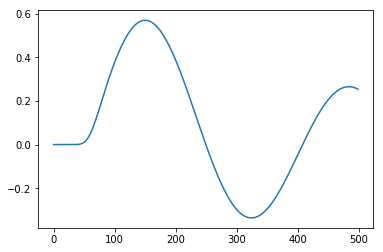

In [65]:
b, a = bessel(10, 0.05, 'low')
lopassed = lfilter(b, a, samplehold(new_x))
plot(lopassed)


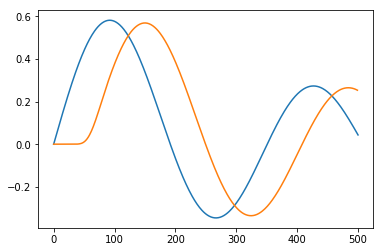

In [66]:
plot(new_x*50, jn(1,new_x))
plot(lopassed)

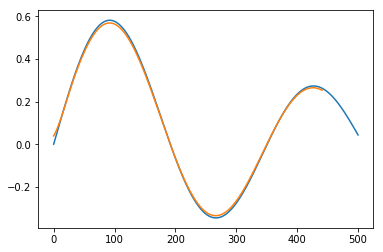

In [67]:
plot(new_x*50, jn(1,new_x))
plot(lopassed[58:])

By: Andrés Cabrera mantaraya36@gmail.com
For MAT course MAT 201A at UCSB

This ipython notebook is licensed under the CC-BY-NC-SA license: http://creativecommons.org/licenses/by-nc-sa/4.0/

![http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png](http://i.creativecommons.org/l/by-nc-sa/3.0/88x31.png)